比賽簡介：
泰坦尼克號宇宙飛船是一個月前發射的星際客輪。 這艘船載有近 13,000 名乘客，開始了它的處女航，將移民從我們的太陽系運送到圍繞附近恆星運行的三個新宜居系外行星。
在繞過半人馬座阿爾法星前往其第一個目的地——炎熱的巨蟹座 55 E 的途中，粗心的宇宙飛船泰坦尼克號與隱藏在塵埃雲中的時空異常相撞。 可悲的是，它遭遇了與 1000 年前同名的類似命運。 雖然這艘船完好無損，但幾乎一半的乘客都被傳送到了異次元！
為了幫助救援人員和找回失踪的乘客，您面臨的挑戰是使用從飛船損壞的計算機系統中恢復的記錄來預測哪些乘客被異常運送。

為何選擇這個比賽：
在課程中，老師有教過鐵達尼號生存預測，而這項比賽恰好是其延伸，故除了能鞏固上課所學，也能延伸其應用

資料集、目標介紹
train.csv - 大約三分之二 (~8700) 乘客的個人記錄，用作訓練數據。
test.csv - 其餘三分之一 (~4300) 乘客的個人記錄，用作測試數據。
目標是預測此集合中乘客的 Transported 值。
sample_submission.csv - 格式正確的提交文件。


實作內容：
將整個模組建議在上課所學的鐵達能號生存預測之上，並在圖表上繪製兩變數相關之函數。
在年齡補缺失資料時，我嘗試找尋Age與Transported之關係，分為藍色及紅色柱狀圖
在機器訓練時，有參考別人寫好的程式碼，並從中學到膜性訓練及測試的方式


import modules


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import seaborn as sns


載入資料集並查看

In [4]:
df=pd.read_csv("train.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


去除不需要的部分並確認表格長相

In [5]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


資料觀察

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\user\AppData\Local\Temp\ipykernel_22040\662795131.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Transported').mean()


HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Transported     False
dtype: bool

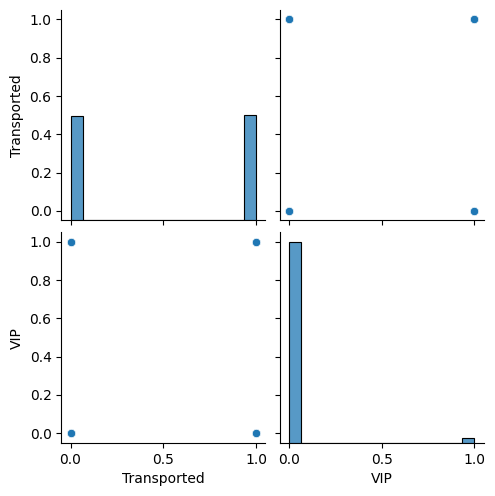

In [6]:
sns.pairplot(df[['Transported','VIP']],dropna=True)
df.groupby('Transported').mean()
df['CryoSleep'].value_counts()
df['VIP'].value_counts()
df['HomePlanet'].value_counts()
df['Destination'].value_counts()

df.isnull().sum()
len(df)/2
df.isnull().sum()>(len(df)/2)

將遺失的資料補齊

In [ ]:
df['HomePlanet'].unique().tolist()
df['HomePlanet']=df['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
df['HomePlanet'].value_counts()

df['Destination'].unique().tolist()
df['Destination']=df['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
df['Destination'].value_counts()

df['Age'].isnull().value_counts()
df['Age'].unique()
index_Transported = (df["Age"].isnull()==False)&(df["Transported"]==1)
index_distransported = (df["Age"].isnull()==False)&(df["Transported"]==0)
sns.distplot( df.loc[index_Transported ,'Age'], bins=20, color='blue', label='Transported' )
sns.distplot( df.loc[index_distransported ,'Age'], bins=20, color='red', label='Transported' )
df.groupby('Transported')['Age'].median()

df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)
df[['CryoSleep', 'VIP','Transported']] = (df[['CryoSleep', 'VIP','Transported']] == True).astype(int)
df.tail()

df[['Deck', 'num','side']] = df['Cabin'].str.split('/', expand=True)
df=df.drop(['Cabin'],axis=1)
df.head() 
df.nunique().sort_values(ascending=False)
df['Deck'].value_counts()
df['Deck'].unique().tolist()
df['Deck']=df['Deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
df['Deck'].value_counts()

df['side'].unique().tolist()
df['side']=df['side'].replace({'P':0, 'S':1})
df['side'].value_counts()
df['side']=df['Deck'].replace({'P':0, 'S':1})
df['side'].value_counts()

nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

df = df.select_dtypes(include=[np.number]).interpolate().dropna()

sum(df.isnull().sum() != 0)

df.isnull().sum()

資料分析

In [ ]:
df.head()
df.info()

df.corr()

X = df.drop("Transported",axis=1)
y = df["Transported"]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print(y.shape)
print(X.shape, X_train.shape, X_test.shape)
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(max_iter=150)

lr.fit(X_train, y_train)

predictions=lr.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

accuracy_score(y_test,predictions)
recall_score(y_test,predictions)
precision_score(y_test,predictions)
confusion_matrix(y_test,predictions)
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['distransported', 'transported'],index=['distransported','transported'])

import joblib  
joblib.dump(lr,'Space_Titanic-LR1.pkl',compress=3)

將test資料集放入，並得出比賽所需之結果

In [ ]:
import joblib
model_pretrained=joblib.load('Space_Titanic-LR1.pkl')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_test=pd.read_csv("test.csv")


df_test['HomePlanet']=df_test['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0],inplace = True)
df_test['HomePlanet'].value_counts()

df_test['Destination']=df_test['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
df_test['Destination'].value_counts()

df_test['Age'].fillna(df_test['Age'].mode()[0],inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].mode()[0],inplace = True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].mode()[0],inplace = True)
df_test['Spa'].fillna(df_test['Spa'].mode()[0], inplace = True)
df_test['VRDeck'].fillna(df_test['VRDeck'].mode()[0], inplace = True)
df_test.isnull().sum()
df_test[['CryoSleep', 'VIP']] = (df_test[['CryoSleep', 'VIP']] == True).astype(int)
df_test[['Deck', 'num','side']] = df_test['Cabin'].str.split('/', expand=True)
df_test=df_test.drop(['Cabin'],axis=1)
df_test.head()

df_test['Deck']=df_test['Deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
df_test['Deck'].value_counts()
df_test['side']=df_test['side'].replace({'P':0, 'S':1})
df_test['side'].value_counts()
df_test['side']=df_test['Deck'].replace({'P':0, 'S':1})
df_test['side'].value_counts()

nulls = pd.DataFrame(df_test.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

df_test.isnull().sum()

df_test['RoomService'].fillna(df_test['RoomService'].mode()[0], inplace = True)

df_test.isnull().sum()

X = df.drop("Transported",axis=1)
y = df["Transported"]
passengers=df_test['PassengerId']
final=pd.DataFrame(data=(passengers),columns=['PassengerId'])
final.loc[:,"Transported"]=y_test
final.head(20)
final['Transported'].value_counts()
final.to_csv('submission.csv',index=False)
sub=pd.read_csv('./submission.csv')
sub.Transported.astype(bool)

sub['Transported'].value_counts()
sub['Transported'].isnull().sum()
sub['Transported'].fillna(sub['Transported'].mode()[0], inplace = True)

sub.to_csv("submission.csv",index=False)